<a href="https://colab.research.google.com/github/RichardRajesh/5731-Computational-methods/blob/main/Rajesh_Bodas_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [ ]:
pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.5/158.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 15.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 15.7 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (73

In [15]:
import pandas as pd
from gensim import corpora, models
from sklearn.feature_extraction.text import CountVectorizer
from bertopic import BERTopic
import gensim  # Add this import statement

# Load the dataset
Input_Data = pd.read_csv("sample_data/cleaned_movie_reviews.csv")

# Preprocess the text data (assuming 'cleaned_text' column contains preprocessed text)
Docs = Input_Data['Clean Text'].tolist()

# LDA
Vect = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
Term_Docs = Vect.fit_transform(Docs)
# Convert doc_term_matrix into a Gensim-compatible format
Raw_Corp = gensim.matutils.Sparse2Corpus(Term_Docs, documents_columns=False)
# Create a dictionary mapping word IDs to words
Word_ID = {v: k for k, v in Vect.vocabulary_.items()}
Model = models.LdaModel(Raw_Corp, num_topics=10, id2word=Word_ID, passes=20)
Topics = Model.show_topics(num_topics=10, num_words=10, formatted=False)

# BERTopic
Model_Topic = BERTopic()
Out_Topics, _ = Model_Topic.fit_transform(Docs)
Topics_Bert = Model_Topic.get_topic_info()

# Print features (text representation) used for topic modeling
print("Features used for topic modeling:")
print("LDA Features:")
for topic in Topics:
    print(topic)

# Print top 10 clusters for topic modeling
print("\nTop 10 clusters for topic modeling:")
print("LDA Clusters:")
print(Topics)

# Summarize and describe the topic for each cluster
print("\nSummarize and describe the topic for each cluster:")
# You can provide descriptions based on the most frequent words in each cluster or by manually reviewing the content.


Features used for topic modeling:
LDA Features:
(0, [('godzilla', 0.044107057), ('gojira', 0.018167978), ('film', 0.01686725), ('minu', 0.016867112), ('japan', 0.015572017), ('movi', 0.012975721), ('monster', 0.009086982), ('japanes', 0.007788923), ('giant', 0.0077880267), ('shin', 0.0077876723)])
(1, [('godzilla', 0.031158578), ('film', 0.022253808), ('stori', 0.017799156), ('love', 0.0177971), ('japanes', 0.017796261), ('war', 0.0133527275), ('develop', 0.013349397), ('movi', 0.008912506), ('monster', 0.008910114), ('japan', 0.00890693)])
(2, [('godzilla', 0.048739795), ('movi', 0.031541266), ('realli', 0.025807455), ('charact', 0.022945294), ('minu', 0.014342343), ('monster', 0.01147653), ('love', 0.011474385), ('end', 0.011474085), ('new', 0.011473568), ('film', 0.011473171)])
(3, [('movi', 0.04075424), ('time', 0.029111313), ('godzilla', 0.017483141), ('monster', 0.01747568), ('way', 0.017470066), ('everi', 0.01747004), ('charact', 0.011661373), ('japan', 0.011653947), ('emot', 0.

cluster 0 : The topic here is focussed on the movie data such as its name.
cluster 1 : The topic is related to the movie direction and music.
Cluster 2 : The topic here is on experience of watching movie as it has 'time', 'watch' words.
Cluster 3 : The topic here is about the openions as it has 'like'
Cluster 4 : The topic here is about the development and charecters involved in the film.
Cluster 5 : Topic here it about the positive feedback on the movie as it has 'Action', 'great'.
Cluster 6 : The Topic might be related to movie and its experience of the movie.
Cluster 7 : Since it has point, look, time it coukd be related to a descussion on the movie details.
Cluster 8: Since there are few names from the film and the terms like war, it coulld be about the play of the film.
Cluster 9: As there are words like action, good etc., it could the experience after the film.

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [21]:
Sentiment_data = pd.read_csv("sample_data/modified_cleaned_movie_reviews.csv")
Sentiment_data.head(5)


,1,Clean Text,Sentiment
0,2,godzilla minu one ryunosuk kamiki minami hamab...,Positive
1,3,would call huge godzilla fan mean mainli went ...,Positive
2,4,im huge fan godzilla think origin genuin class...,Positive
3,5,love monster movi enjoy big dumb fun action mo...,Positive
4,6,excit film pace stori imagin product done expe...,Positive


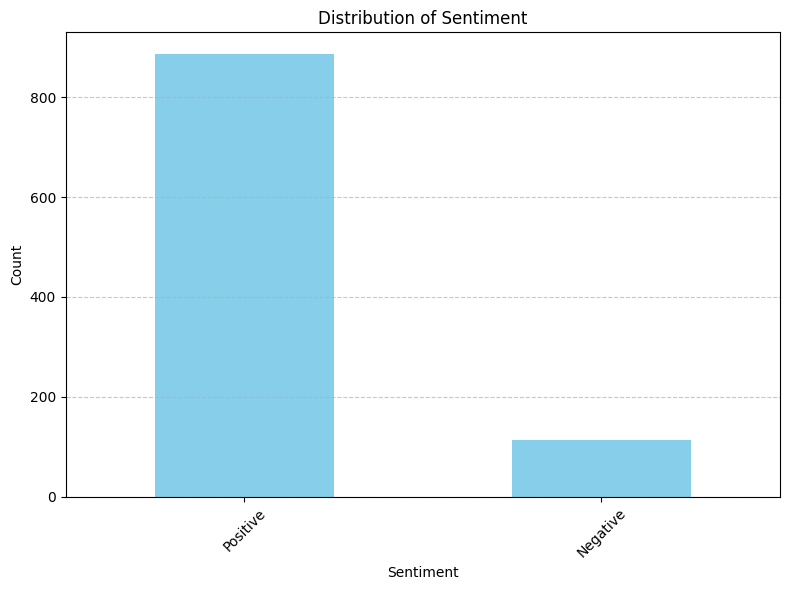

In [26]:
import matplotlib.pyplot as plt
sentiment_count = Sentiment_data['Sentiment'].value_counts()

# Plot the distribution of sentiment
plt.figure(figsize=(8, 6))
sentiment_count.plot(kind='bar', color='skyblue')
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [19]:
# Write your code here
# Load necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Prepare data
X = Sentiment_data['Clean Text']
y = Sentiment_data['Sentiment']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature extraction: TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Build SVM classifier
svm_classifier = SVC(kernel='linear', C=1)
svm_classifier.fit(X_train_tfidf, y_train)

# Predictions
svm_predictions = svm_classifier.predict(X_test_tfidf)

# Evaluate performance
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions, average='weighted')
svm_recall = recall_score(y_test, svm_predictions, average='weighted')
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')

print("SVM Classifier Performance:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1)





SVM Classifier Performance:
Accuracy: 0.96
Precision: 0.961711229946524
Recall: 0.96
F1 Score: 0.9557312761170041


In [20]:
# Load necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Build Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

# Predictions
rf_predictions = rf_classifier.predict(X_test_tfidf)

# Evaluate performance
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='weighted')
rf_recall = recall_score(y_test, rf_predictions, average='weighted')
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')

print("\nRandom Forest Classifier Performance:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)



Random Forest Classifier Performance:
Accuracy: 0.96
Precision: 0.961711229946524
Recall: 0.96
F1 Score: 0.9557312761170041


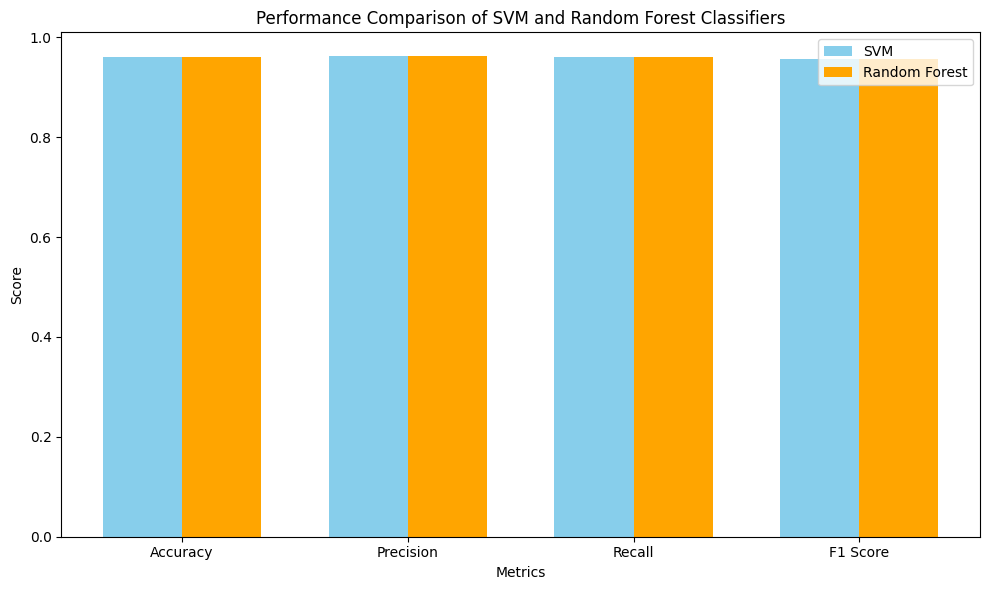

In [27]:
import matplotlib.pyplot as plt

# Performance metrics for SVM classifier
svm_metrics = [svm_accuracy, svm_precision, svm_recall, svm_f1]
svm_metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Performance metrics for Random Forest classifier
rf_metrics = [rf_accuracy, rf_precision, rf_recall, rf_f1]

# Create a bar plot
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(svm_metrics))

plt.bar(index, svm_metrics, bar_width, label='SVM', color='skyblue')
plt.bar([i + bar_width for i in index], rf_metrics, bar_width, label='Random Forest', color='orange')

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Performance Comparison of SVM and Random Forest Classifiers')
plt.xticks([i + bar_width/2 for i in index], svm_metric_names)
plt.legend()
plt.tight_layout()
plt.show()


# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

In [28]:
# Write your code here


# Load the training and test data
data_Train = pd.read_csv('sample_data/train.csv')
data_Test = pd.read_csv('sample_data/test.csv')


In [30]:
print(data_Train.head(),
data_Test.info(),)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

Remaining missing values:
 MasVnrType      872
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64


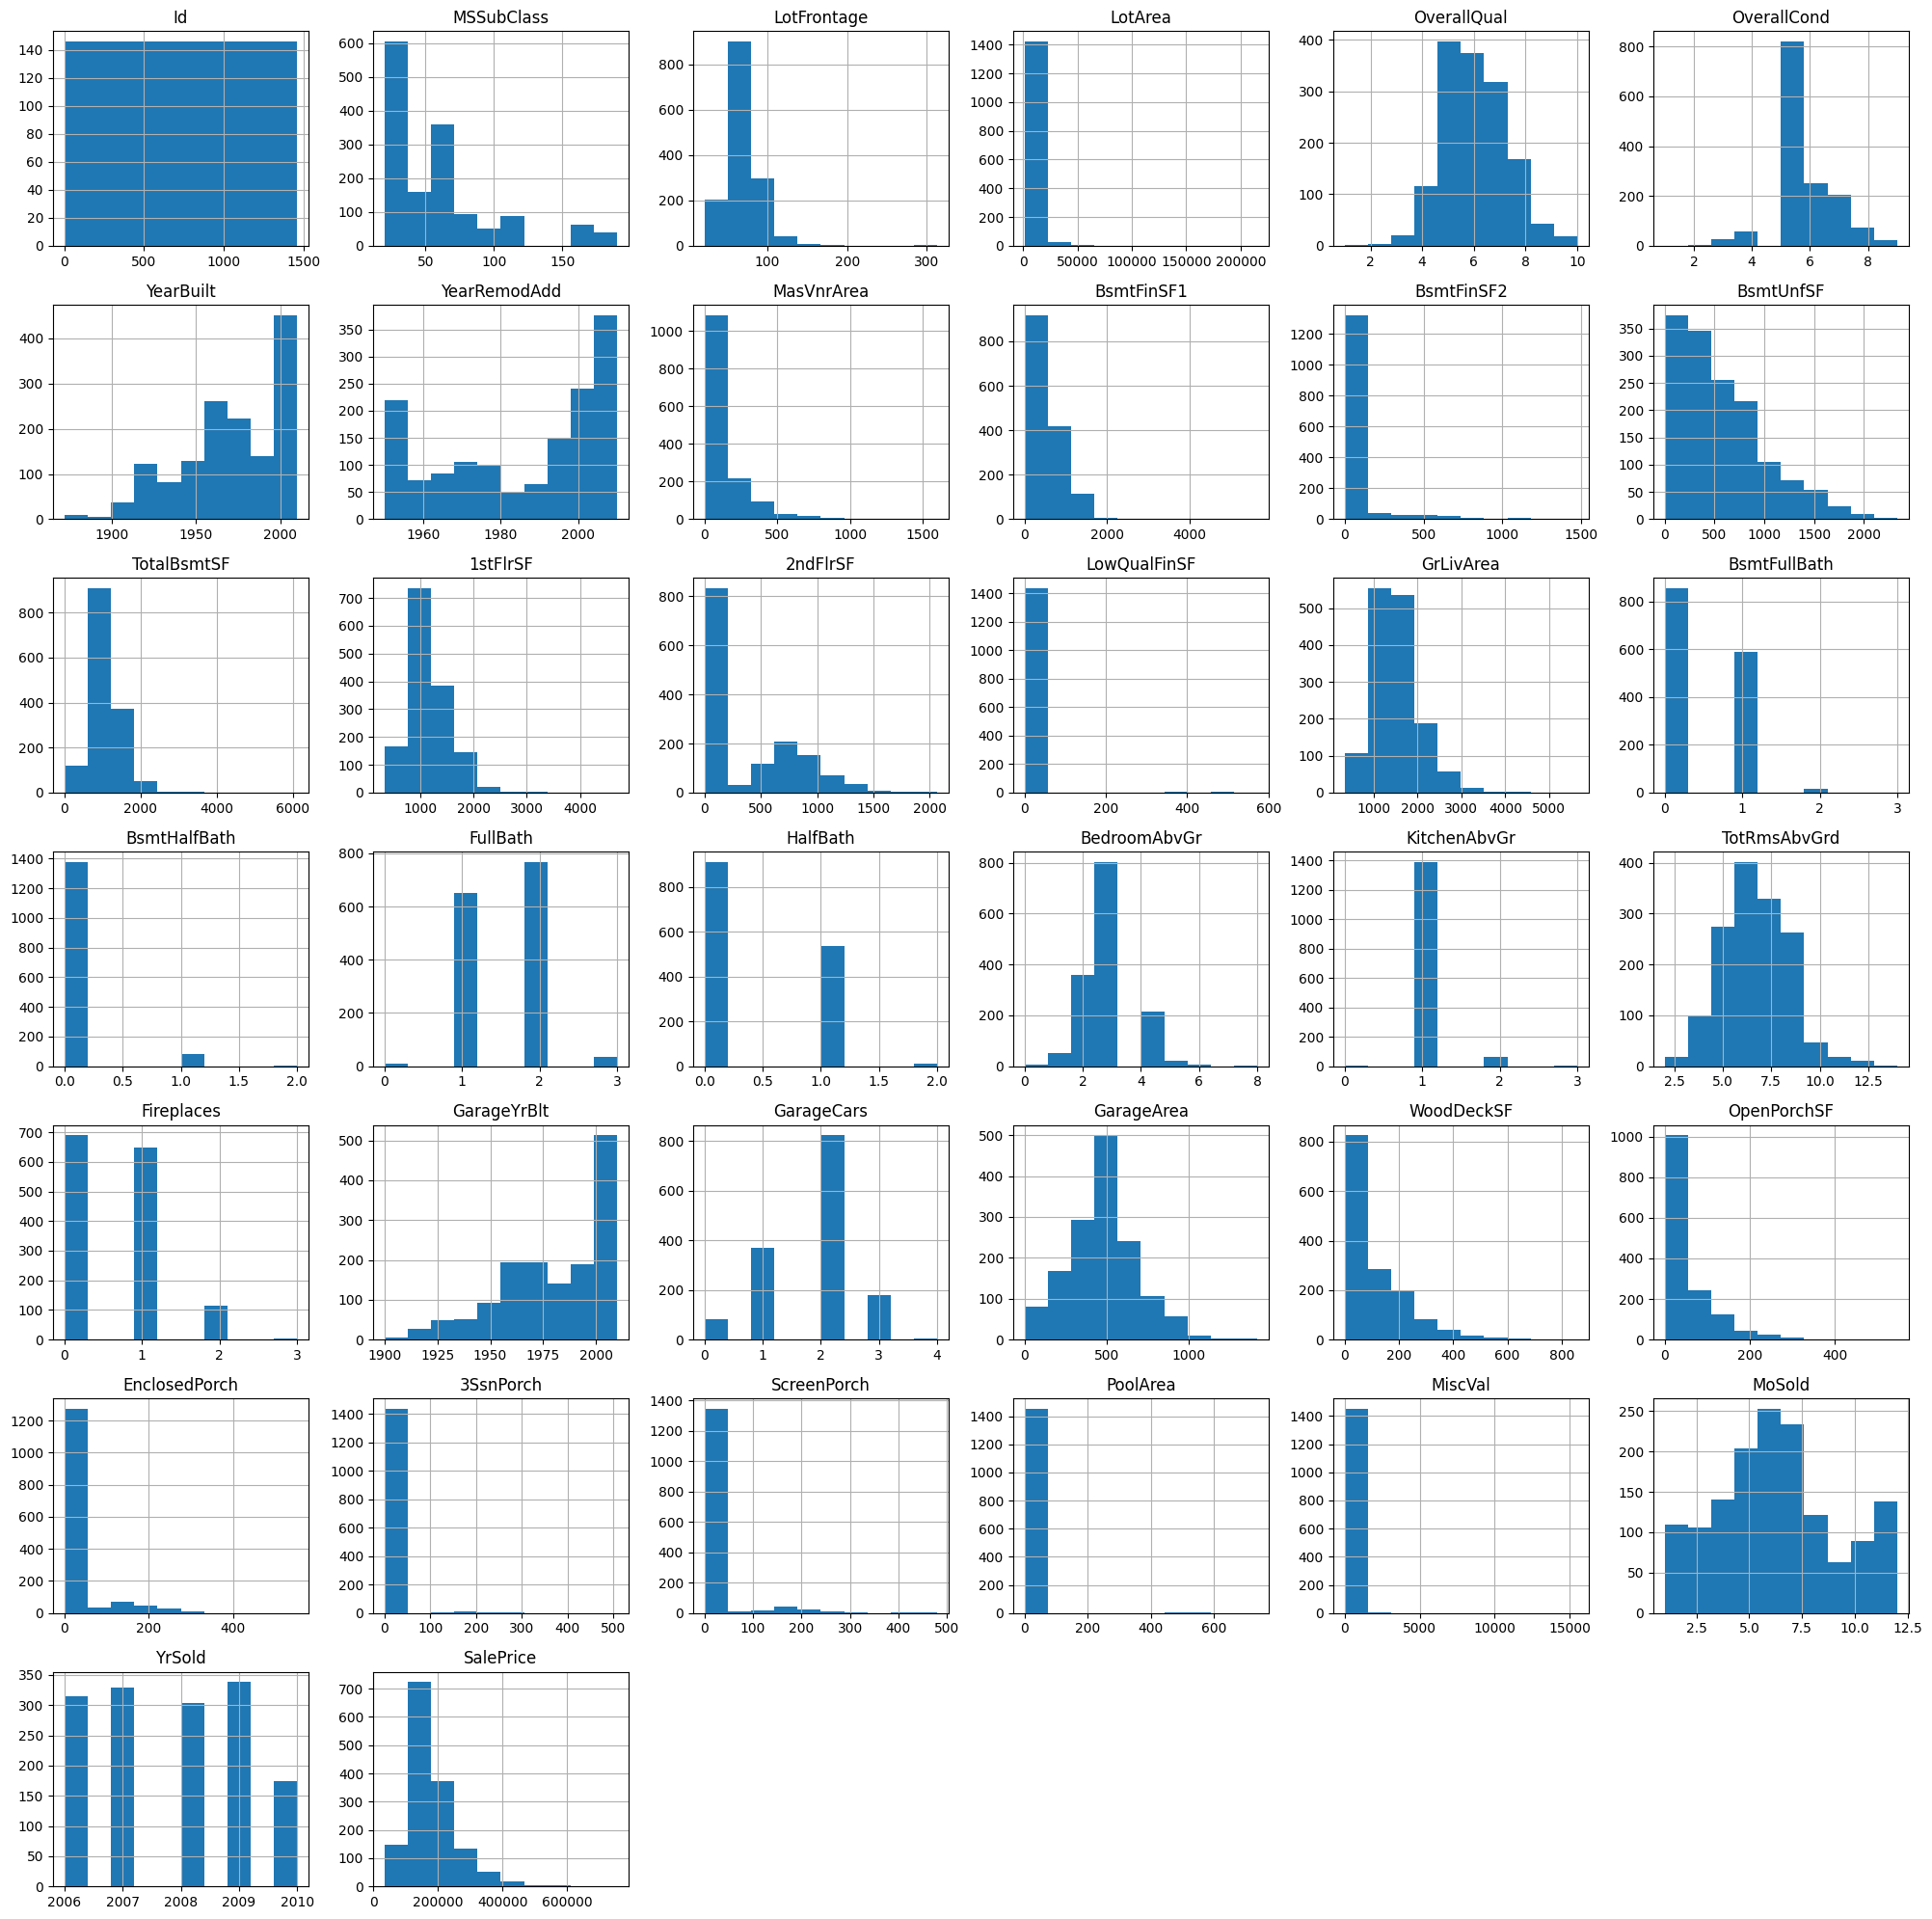

In [31]:
import pandas as pd
import matplotlib.pyplot as plt


# Remove columns: Alley, PoolQC, MiscFeature, Fence
columns_to_remove = ['Alley', 'PoolQC', 'MiscFeature', 'Fence']
data_Train.drop(columns=columns_to_remove, inplace=True)

# Impute missing values in columns with median or mode
# Here, I'm assuming LotFrontage, MasVnrArea, and GarageYrBlt are columns that need imputation
# You can choose other columns based on your analysis
data_Train['LotFrontage'].fillna(data_Train['LotFrontage'].median(), inplace=True)
data_Train['MasVnrArea'].fillna(data_Train['MasVnrArea'].median(), inplace=True)
data_Train['GarageYrBlt'].fillna(data_Train['GarageYrBlt'].mode()[0], inplace=True)

# Remove records with missing values in all columns
data_Train.dropna(how='all', inplace=True)

# Check for remaining missing values
null_values = data_Train.isnull().sum()
print("Remaining missing values:\n", null_values[null_values > 0])

# Draw histograms to understand the data distribution
data_Train.hist(figsize=(20, 20))
plt.tight_layout()
plt.show()

# Make the dataset free of null values (if any)
# Here, I'm dropping rows with any remaining null values
data_Train.dropna(inplace=True)

# Save the cleaned dataset
data_Train.to_csv("cleaned_dataset.csv", index=False)


In [33]:
data_Train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 386 entries, 2 to 1456
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             386 non-null    int64  
 1   MSSubClass     386 non-null    int64  
 2   MSZoning       386 non-null    object 
 3   LotFrontage    386 non-null    float64
 4   LotArea        386 non-null    int64  
 5   Street         386 non-null    object 
 6   LotShape       386 non-null    object 
 7   LandContour    386 non-null    object 
 8   Utilities      386 non-null    object 
 9   LotConfig      386 non-null    object 
 10  LandSlope      386 non-null    object 
 11  Neighborhood   386 non-null    object 
 12  Condition1     386 non-null    object 
 13  Condition2     386 non-null    object 
 14  BldgType       386 non-null    object 
 15  HouseStyle     386 non-null    object 
 16  OverallQual    386 non-null    int64  
 17  OverallCond    386 non-null    int64  
 18  YearBuilt     

# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [ ]:
# Write your code here


